## GA

In [2]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

[21 19 20 32 33 22 23 26 25 30 31 29 28 27 24 11  6  5  7  8  3  2  1  0
  4  9 10 12 16 17 14 13 15 18]
best_distance: 16013.0 time cost: 1.0906531810760498


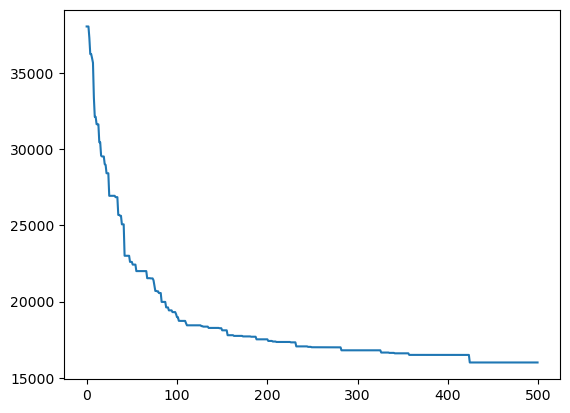

In [3]:
df = pd.read_csv('distance_matrix.csv')
num_points = 34
distance_matrix = np.round(df.values)
def cal_total_distance(routine):
    '''The objective function. input routine, return total distance.
    cal_total_distance(np.arange(num_points))
    '''
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])


# %% do GA

from sko.GA import GA_TSP

ga_tsp = GA_TSP(func=cal_total_distance, n_dim=num_points, size_pop=50, max_iter=500, prob_mut=1)
time_start = time.time()
best_points, best_distance = ga_tsp.run()
time_end = time.time()
print(best_points)
print('best_distance:', best_distance[0], 'time cost:', time_end - time_start)
fig, ax = plt.subplots()
ax.plot(ga_tsp.generation_best_Y)
plt.show()

In [4]:
routine = pd.DataFrame(columns=["city","lat", "lon"])
df_start = pd.read_csv('cityinfo.csv')

for i in range(34):
    routine.loc[i] = df_start.loc[best_points[i]]

import folium

# 创建一个中心位于北京的地图
m = folium.Map(location=[39.9042, 116.4074], zoom_start=5)

# 假设我们有一个包含城市坐标的数据集
cities_data = routine

# 添加城市标记
for index, row in cities_data.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=row['city'],
        icon=folium.Icon(color='red')
    ).add_to(m)

# 连接城市
temp = cities_data[['lat', 'lon']].values.tolist()
locations = np.vstack((temp, temp[0]))
folium.PolyLine(locations, color="blue", weight=2.5, opacity=1).add_to(m)

m.save('routine_GA.html')